Open Food Facts

### Sommaire

* [Importer les libraries](#chapter1)
* [Importer le csvs](#chapter2)
* [Dataset](#chapter3)
* [Valuers manquant](#chapter4)


<a class="anchor" id="chapter1"></a>Importer les libraries

In [138]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.gridspec as gridspec
import sklearn
import warnings

pd.set_option('display.max_row',200)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

<a class="anchor" id="chapter2"></a>Importer le csv

In [139]:
df_off = pd.read_csv('./off.csv', sep="\t")

C:\Users\utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<a class="anchor" id="chapter3"></a>Dataset

In [140]:
df_off

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,...,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:RO,en:

In [141]:
df_off.shape

(320772, 162)

In [142]:
df_off.isna().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [143]:
df_off.count().sum()

12356475

In [144]:
df_off.isna().sum().sum()
#39608589 NaNs pour 51965064 observations, presque 76%

39608589

In [145]:
#Noms de colonne dans df_off
df_off.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

<a class="anchor" id="chapter4"></a>Valeurs manquant

In [146]:
#Valeurs manquant dans df_off
df_off.isnull().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [147]:
#Pourcentage de valeurs manquants
((df_off.isnull() | df_off.isna()).sum() * 100 / df_off.index.size).round(2)

code                                            0.01
url                                             0.01
creator                                         0.00
created_t                                       0.00
created_datetime                                0.00
last_modified_t                                 0.00
last_modified_datetime                          0.00
product_name                                    5.54
generic_name                                   83.54
quantity                                       67.32
packaging                                      75.38
packaging_tags                                 75.38
brands                                          8.86
brands_tags                                     8.86
categories                                     73.69
categories_tags                                73.69
categories_fr                                  73.69
origins                                        93.08
origins_tags                                  

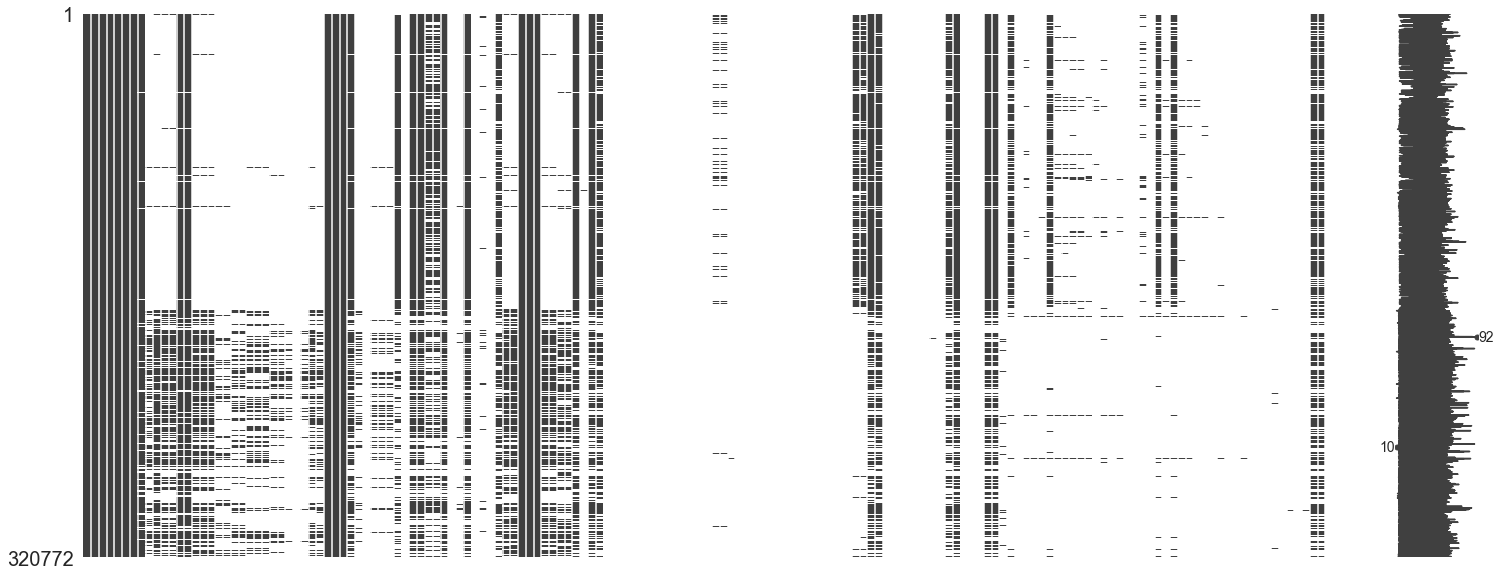

In [148]:
#Valeurs manquant heatmap
msno.matrix(df_off, False, True)

In [149]:
#Count de valeurs unique
df_off.nunique()

code                                          320638
url                                           320749
creator                                         3535
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

In [150]:
# Copie du jeu de données
df_food = df_off.copy()
df_food.shape

(320772, 162)

In [151]:
liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']
#df_food = df_food.drop(['nutrition-score-uk_100g'],axis=1)    
df_food_fr = df_food[df_food['countries'].isin(liste_pays)]

In [152]:
df_food_fr['countries'].unique()

array(['en:FR', 'France', 'Réunion', 'Nouvelle-Calédonie', 'FR',
       'Martinique', 'Guadeloupe', 'Frankrijk', 'france', 'Frankreich',
       'French Polynesia', 'Francia', 'Mayotte'], dtype=object)

In [153]:
df_food_fr['countries'] = df_food_fr['countries'].replace(['en:FR'], 'France')
df_food_fr['countries'] = df_food_fr['countries'].replace(['FR'], 'France')
df_food_fr['countries'] = df_food_fr['countries'].replace(['france'], 'France')
df_food_fr['countries'] = df_food_fr['countries'].replace(['Frankreich'], 'France')
df_food_fr['countries'] = df_food_fr['countries'].replace(['Francia'], 'France')
df_food_fr['countries'] = df_food_fr['countries'].replace(['Frankrijk'], 'France')

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [154]:
columns_empty = ['cities', 'traces', 'allergens_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 
                 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'butyric-acid_100g', 'caproic-acid_100g',
                 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
                 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 
                 'montanic-acid_100g', 'melissic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 
                 'erucic-acid_100g', 'nervonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 
                 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 
                 'glucose_100g', 'maltose_100g', 'folates_100g', 'molybdenum_100g', 'chlorophyl_100g', 'glycemic-index_100g',
                 'water-hardness_100g']

# Dropping useless columns
df_clean_fr = df_food_fr.drop(columns=columns_empty)

In [155]:
nb_rows, nb_columns = df_clean_fr.shape

# Count of the values on each column
columns_count = df_clean_fr.count()

# Sort the Series
columns_count = columns_count.sort_values(ascending=False)

# Calculating filling rates
filling_rates = columns_count / nb_rows

In [156]:
filling_rates

code                                       1.00000
countries_fr                               1.00000
countries                                  1.00000
states                                     1.00000
states_tags                                1.00000
states_fr                                  1.00000
url                                        1.00000
countries_tags                             1.00000
last_modified_t                            1.00000
creator                                    1.00000
created_t                                  1.00000
last_modified_datetime                     1.00000
created_datetime                           1.00000
product_name                               0.92597
brands                                     0.87438
brands_tags                                0.87434
quantity                                   0.71778
pnns_groups_2                              0.67445
pnns_groups_1                              0.65323
energy_100g                    

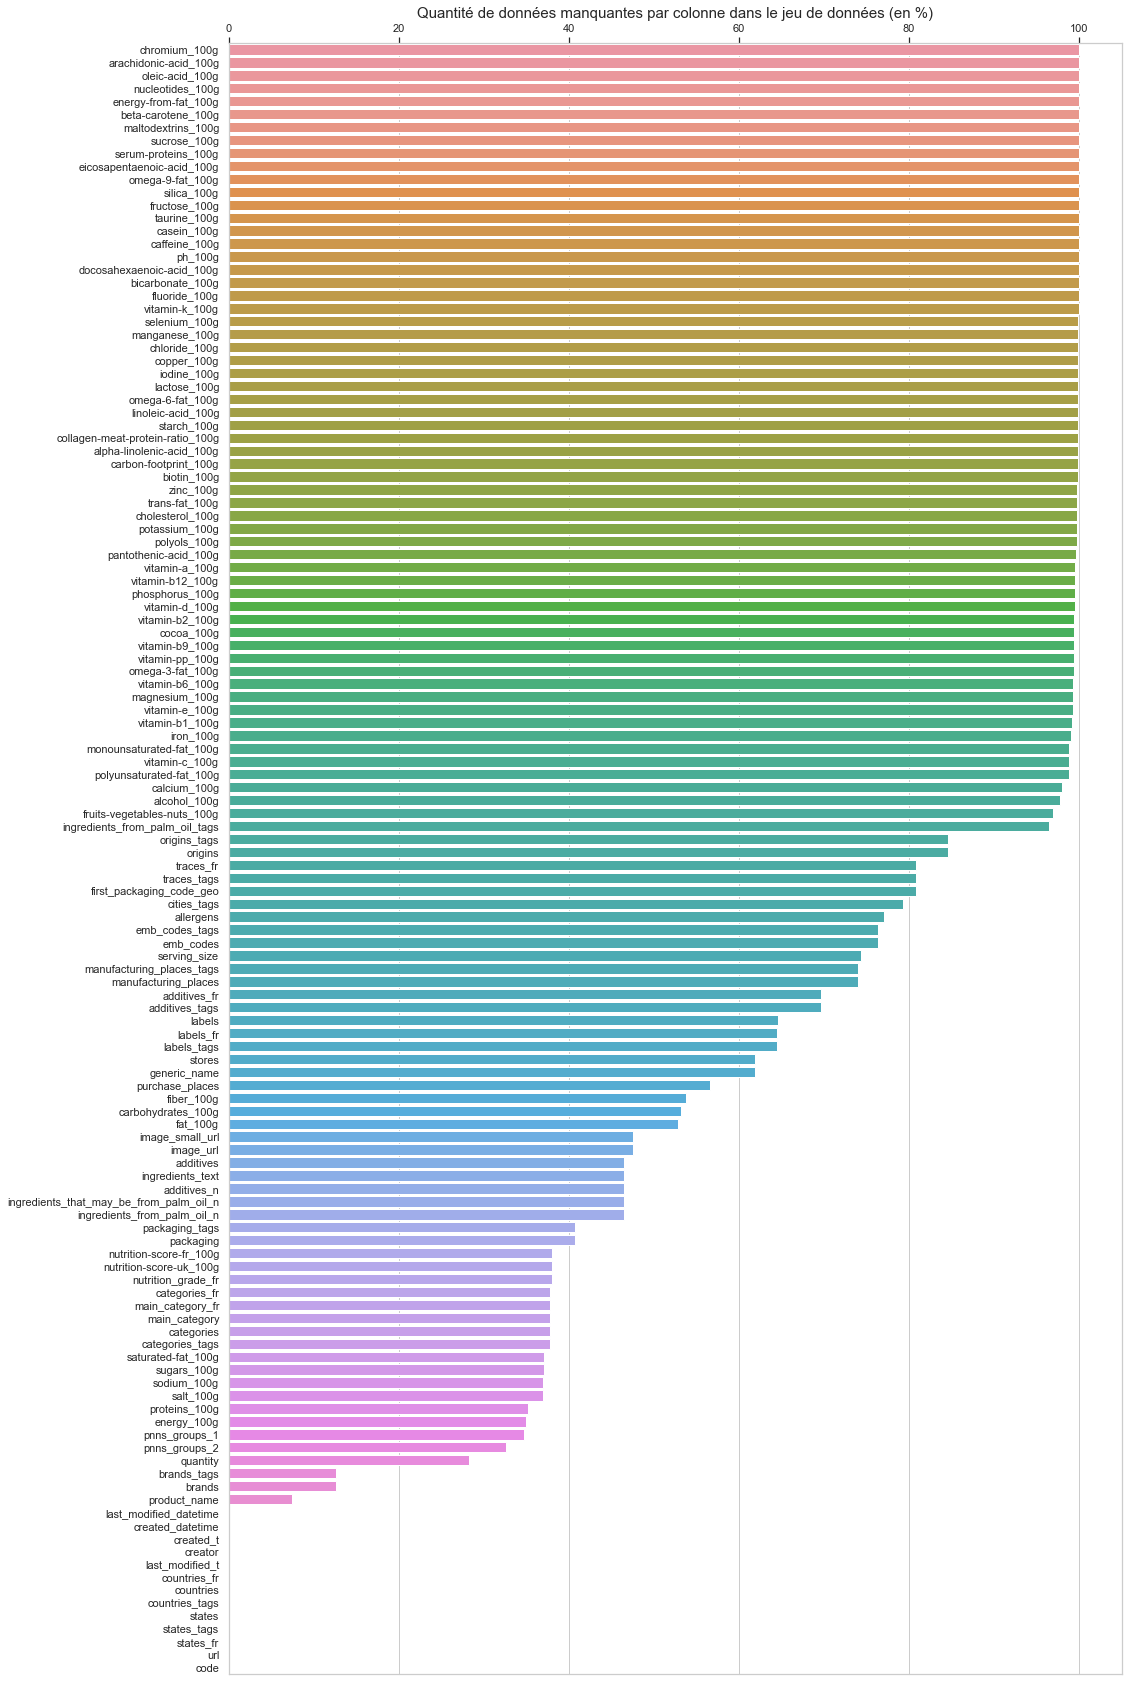

In [157]:
proportion_nan = df_clean_fr.isna().sum().divide(df_clean_fr.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [158]:
#Pour éliminer les valeurs manquantes de plus de 60 "thresh".
df_clean = df_clean_fr.dropna(thresh=df_clean_fr.shape[0]*0.6,how='all',axis=1)

In [159]:
df_clean

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,2.46 kg,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,France,en:france,France,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,1 kg,Bertrand Lejeune,bertrand-lejeune,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",France,en:france,France,NaN,Cereals and potatoes,Legumes,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",en:plant-based-foods-and-beverages,Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),750 ml,Roussette du Bugey,roussette-du-bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...","en:beverages,en:alcoholic-beverages,en:wines,e...","Boissons,Boissons alcoolisées,Vins,Vins frança...",France,en:france,France,NaN,NaN,Alcoholic beverages,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,50 g,Lobodis,lobodis,thés verts,"en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",France,en:france,France,c,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...

In [160]:
#Pourcentage de valeurs manquants
((df_clean.isnull() | df_clean.isna()).sum() * 100 / df_clean.index.size).round(2)

code                        0.00
url                         0.00
creator                     0.00
created_t                   0.00
created_datetime            0.00
last_modified_t             0.00
last_modified_datetime      0.00
product_name                7.40
quantity                   28.22
brands                     12.56
brands_tags                12.57
categories                 37.74
categories_tags            37.74
categories_fr              37.74
countries                   0.00
countries_tags              0.00
countries_fr                0.00
nutrition_grade_fr         38.06
pnns_groups_1              34.68
pnns_groups_2              32.56
states                      0.00
states_tags                 0.00
states_fr                   0.00
main_category              37.74
main_category_fr           37.74
energy_100g                34.94
saturated-fat_100g         37.11
sugars_100g                37.01
proteins_100g              35.21
salt_100g                  36.95
sodium_100

In [161]:
columns_not_nec = ['url', 'creator','created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                   'brands_tags', 'countries_tags', 'states', 'states_tags', 'countries_fr', 'pnns_groups_1', 'main_category', 'pnns_groups_2', 'categories_tags', 'categories_fr' ]
df_clean = df_clean.drop(columns=columns_not_nec)

df_clean                         

,code,product_name,quantity,brands,categories,countries,nutrition_grade_fr,states_fr,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,Filet de bœuf,2.46 kg,NaN,Filet de bœuf,France,NaN,"A compléter,Informations nutritionnelles à com...",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,NaN,NaN,NaN,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,NaN,NaN,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,lentilles vertes,1 kg,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,NaN,"A compléter,Informations nutritionnelles à com...",Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,Roussette du Bugey (2011),750 ml,Roussette du Bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...",France,NaN,"A compléter,Informations nutritionnelles compl...",Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,50 g,Lobodis,thés verts,France,c,"A vérifier,Complet,Informations nutritionnelle...",Thés verts,21.0,0.2,0.5,0.5,0.0254,0.01,2.0,0.0
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,180 g,"Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...",France,NaN,"A vérifier,Complet,Informations nutritionnelle...",Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df_clean = df_clean.dropna(axis=0, how='all') 

In [163]:
df_clean.isnull().sum().sort_values()

code                           0
countries                      0
states_fr                      0
product_name                6995
brands                     11869
quantity                   26666
energy_100g                33017
proteins_100g              33266
salt_100g                  34911
sodium_100g                34914
sugars_100g                34970
saturated-fat_100g         35067
main_category_fr           35655
categories                 35655
nutrition_grade_fr         35957
nutrition-score-fr_100g    35957
nutrition-score-uk_100g    35957
dtype: int64

In [164]:
df_clean['product_name'].fillna(value='Product without name', inplace=True)
df_clean['brands'].fillna(value='Unknown', inplace=True)

In [165]:
df_clean.head()

,code,product_name,quantity,brands,categories,countries,nutrition_grade_fr,states_fr,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,Filet de bœuf,2.46 kg,Unknown,Filet de bœuf,France,NaN,"A compléter,Informations nutritionnelles à com...",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,Product without name,NaN,Unknown,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,Twix x2,NaN,Unknown,NaN,France,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,lentilles vertes,1 kg,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...",France,NaN,"A compléter,Informations nutritionnelles à com...",Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
#Duplicated data
df_clean.duplicated().sum()

0

In [167]:
#To drop all duplicates from our data
df_clean.drop_duplicates(inplace=True)

In [168]:
df_clean['nutrition_grade_fr'].unique()

array([nan, 'd', 'e', 'c', 'b', 'a'], dtype=object)

In [169]:
df_clean['nutrition_grade_fr'].fillna(value='No Grade', inplace=True)

In [170]:
df_clean['countries'].unique()

array(['France', 'Réunion', 'Nouvelle-Calédonie', 'Martinique',
       'Guadeloupe', 'French Polynesia', 'Mayotte'], dtype=object)

In [171]:
gg = df_clean.copy()

In [172]:
gg2=gg.dropna()
gg2=gg.dropna(axis=0)

In [173]:
gg2.to_csv('off2.csv', index=False)

In [174]:
gg2.shape

(40117, 17)

In [175]:
gg.isna().sum()

code                           0
product_name                   0
quantity                   26666
brands                         0
categories                 35655
countries                      0
nutrition_grade_fr             0
states_fr                      0
main_category_fr           35655
energy_100g                33017
saturated-fat_100g         35067
sugars_100g                34970
proteins_100g              33266
salt_100g                  34911
sodium_100g                34914
nutrition-score-fr_100g    35957
nutrition-score-uk_100g    35957
dtype: int64

In [176]:
moyenne = ['proteins_100g', 'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'sodium_100g']
moyenne

['proteins_100g',
 'energy_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'salt_100g',
 'sodium_100g']

In [177]:
moyenne_protein = gg['proteins_100g'].mean()
moyenne_energy = gg['energy_100g'].mean()
moyenne_sat_fat = gg['saturated-fat_100g'].mean()
moyenne_sugar = gg['sugars_100g'].mean()
moyenne_salt = gg['salt_100g'].mean()
moyenne_sodium = gg['sodium_100g'].mean()

In [178]:
gg['proteins_100g'].fillna(value=gg['proteins_100g'].mean(), inplace=True)
gg['energy_100g'].fillna(value=gg['energy_100g'].mean(), inplace=True)
gg['saturated-fat_100g'].fillna(value=gg['saturated-fat_100g'].mean(), inplace=True)
gg['sugars_100g'].fillna(value=gg['sugars_100g'].mean(), inplace=True)
gg['salt_100g'].fillna(value=gg['salt_100g'].mean(), inplace=True)
gg['sodium_100g'].fillna(value=gg['sodium_100g'].mean(), inplace=True)

In [179]:
gg.isna().sum()

code                           0
product_name                   0
quantity                   26666
brands                         0
categories                 35655
countries                      0
nutrition_grade_fr             0
states_fr                      0
main_category_fr           35655
energy_100g                    0
saturated-fat_100g             0
sugars_100g                    0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g    35957
nutrition-score-uk_100g    35957
dtype: int64

In [180]:
gg.to_csv('off3.csv', index=False)